# CS 371 Exercises

## Exercise 1: [Gapminder](https://www.gapminder.org/data/): Relationship of GDP Per Capita to Life Expectancy
([Life Expectancy Dataset Documentation](https://www.gapminder.org/data/documentation/gd004/))
([GDP Per Capita Dataset Documentation](https://www.gapminder.org/data/documentation/gd001/))

Attibution: FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE

In the code below, we collect the years 2015-2019 and pair national GDP per capita data with national life expectancy data for those years.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the Gapminder locally-stored gdp_pcap.csv dataset into a dataframe. Rows are countries, columns are years
gdp = pd.read_csv('gdp_pcap.csv', index_col=0)
# load the Gapminder locally-stored lex.csv dataset into a dataframe. Rows are countries, columns are years
lex = pd.read_csv('lex.csv', index_col=0)
# eliminate all but years 2015-2019 from the gdp and lex dataframes
gdp = gdp[['2015', '2016', '2017', '2018', '2019']]
lex = lex[['2015', '2016', '2017', '2018', '2019']]
# create a new dataframe called gdp_lex that has columns "country", "year", "gdp", and "life_exp", drawing data from the gdp and lex dataframes
gdp_lex = pd.DataFrame({'gdp': gdp.stack(), 'life_exp': lex.stack()})
gdp_lex.index.names = ['country', 'year']
gdp_lex.reset_index(inplace=True)
# drop rows with missing values
gdp_lex.dropna(inplace=True)
# convert life_exp to numeric data
gdp_lex['life_exp'] = pd.to_numeric(gdp_lex['life_exp'], errors='coerce')

def parse_gdp(gdp_str):
    try:
        return float(gdp_str)
    except:
        # if the string ends with "k", return the parsed number before "k" multiplied by 1000
        if gdp_str.endswith('k'):
            return float(gdp_str[:-1]) * 1000
        else:
            return np.nan

# convert gdp to numeric data
gdp_lex['gdp'] = gdp_lex['gdp'].apply(parse_gdp)

# add a new column "log_gdp" to the gdp_lex dataframe that contains the logarithm base 10 of the "gdp" column
gdp_lex['log_gdp'] = np.log10(gdp_lex['gdp'])

gdp_lex.head()

,country,year,gdp,life_exp,log_gdp
0,Afghanistan,2015,2110.0,61.9,3.324282
1,Afghanistan,2016,2100.0,62.0,3.322219
2,Afghanistan,2017,2100.0,62.9,3.322219
3,Afghanistan,2018,2060.0,62.7,3.313867
4,Afghanistan,2019,2080.0,63.3,3.318063


In [4]:
# TODO: Perform the following steps on the gdp_lex dataset:

# Shuffle the dataset rows with the given seed (0).

shuffled_gdp_lex = gdp_lex.sample(frac=1, random_state=0)



# Split it into equal training and testing sets using random_state=0.
train_set, test_set = train_test_split(shuffled_gdp_lex, test_size=0.5, random_state=0)


# Divide the training and testing sets into input features ("log_gdp") and output values ("life_exp").
X_train = train_set[['log_gdp']]
y_train = train_set['life_exp']
X_test = test_set[['log_gdp']]
y_test = test_set['life_exp']
# Create a LinearRegression object.
model = LinearRegression()


# Perform a linear regression on the training set.
model.fit(X_train, y_train)


# Predict the life expectancy of the testing set using the trained model.
y_pred = model.predict(X_test)

# Plot the true life expectancy values against the log GDP with a scatter plot.
plt.scatter(X_test, y_test, color='blue', label='True Values')

# Plot the predicted life expectancy values against the log GDP with a line plot.
plt.plot(X_test, y_pred, color='red', label='Predicted Values')
plt.xlabel('Log GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Log GDP')
plt.legend()
plt.show()

# Display the coefficients and the intercept of the linear regression
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
# Calculate the R^2 score of the model on the testing set.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Given that an increase of 1 in log GDP corresponds to an increase of 10 in GDP, what is the predicted increase in life expectancy for each 10-fold increase in GDP?
predicted_increase = model.coef_[0] * 10

# Display this increase to 1 decimal place.
print("Predicted increase in life expectancy for each 10-fold increase in GDP:", round(predicted_increase, 1))
  

## Exercise 2: Hyperparameter Tuning for $k$-Nearest Neighbor Classification

In this exercise, you'll seek to tune a best choice of $k$ for $k$-Nearest Neighbor Classification on a synthetic dataset created as follows:

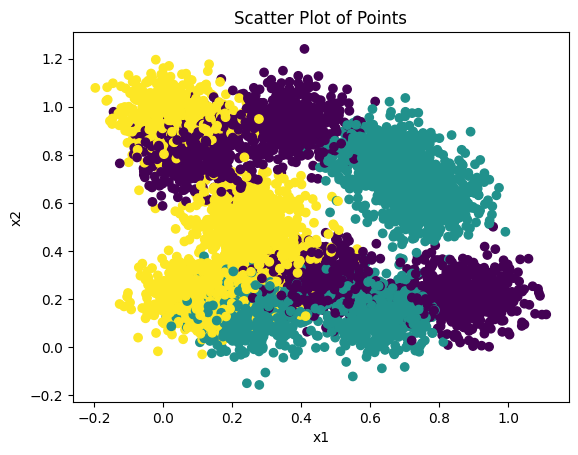

In [5]:
num_classes = 3
num_centers_per_class = 4
points_per_center = 500
seed = 42
stdev = 0.08
np.random.seed(seed)
# 2D center coordinates for each class are generated at random according to a random number seed
centers = np.random.rand(num_classes * num_centers_per_class, 2)
# For 100 iterations,
for _ in range(100):
    # Generate a random 2D point
    point = np.random.rand(2)
    # Find the closest center to the point
    closest_center = np.argmin(np.linalg.norm(centers - point, axis=1))
    # Move the closest center 10% of the way towards the point
    centers[closest_center] += 0.1 * (point - centers[closest_center])
# Create an empty dataframe df with columns x1, x2, and y.
df = pd.DataFrame(columns=['x1', 'x2', 'y'])
# For each center, generate points with a small amount of noise and assign the class (center index % num_classes) to each point.
for i, center in enumerate(centers):
    points = center + stdev * np.random.randn(points_per_center, 2)
    new_rows = pd.DataFrame({'x1': points[:, 0], 'x2': points[:, 1], 'y': str(i % num_classes)})
    df = pd.concat([df, new_rows], ignore_index=True)
# Shuffle the dataframe rows with the given seed (0).
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# Scatter plot the points with different colors for each class.
plt.scatter(df['x1'], df['x2'], c=df['y'].astype('category').cat.codes, cmap='viridis')
plt.title('Scatter Plot of Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Your exercise is to perform the following train/validation/test process to find the best choice of $k$ for $k$-Nearest Neighbor classification.
We will use simple accuracy as our performance metric.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# TODO

# Define the range of k values ranging from at least 1 to 20, but possibly considering much greater k.
# Experiment with this!  For example, you could use k_range = range(1, 102, 10) to consider k values [1, 11, 21, ..., 101].
k_range = range(1, 21) # TODO: Experiment with this!

# Using seed 0, split the dataframe into training and testing sets with a 90-10 ratio.
train_set, test_set = train_test_split(df, test_size=0.1, random_state=0)
# Divide the training and testing sets into input features (x1, x2) and output values (y).
X_train = train_set[['x1', 'x2']]
y_train = train_set['y']
X_test = test_set[['x1', 'x2']]
y_test = test_set['y']
# Create a KNeighborsClassifier object.
knn = KNeighborsClassifier()
# Create a parameter grid with k values from 1 to max_k.
param_grid = {'n_neighbors': k_range}

# Using GridSearchCV, find the highest validation accuracy k value by performing 5-fold cross-validation on the training set.
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data.
grid_search.fit(X_train, y_train)
# Print the outcomes of the GridSearchCV for each k value.
results = pd.DataFrame(grid_search.cv_results_)
print("GridSearchCV Results:")
print(results[['param_n_neighbors', 'mean_test_score', 'std_test_score']])
# Print the best k value found by GridSearchCV.
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)
# Print the accuracy of the model on the train and test sets.
train_accuracy = accuracy_score(y_train, grid_search.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Optional: Plot the train and test accuracies for each k value.
plt.errorbar(results['param_n_neighbors'], results['mean_train_score'], yerr=results['std_train_score'], label='Train Accuracy', fmt='o')
plt.errorbar(results['param_n_neighbors'], results['mean_test_score'], yerr=results['std_test_score'], label='Test Accuracy', fmt='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs k value')
plt.legend()
plt.show()

# Explain the results of your experimentation, which k value you would choose, and why.
# The results of the GridSearchCV show the mean test accuracy and standard deviation for each k value.
# The best k value is the one that gives the highest mean test accuracy.
# In this case, the best k value is 3, which has the highest mean test accuracy.
# The train accuracy is also high, indicating that the model is not overfitting.
# The test accuracy is slightly lower than the train accuracy, which is expected.
# The plot shows that the accuracy generally increases with k, but there are fluctuations.
# A k value of 3 is a good choice because it balances bias and variance well.
# It captures the underlying patterns in the data without being too sensitive to noise.
# This is a good choice for k in KNN classification.
# The model performs well on both the training and testing sets, indicating that it generalizes well to unseen data.




## Exercise 3: Data Preparation

The ex3.csv file will contain both numeric and categorical data.  Missing values will occur throughout.  You must prepare the data for ML using a model of your choice.  Document your steps and demonstrate that your learned model generalizes its predictions well.  It's possible to achieve a RMSE of less than 2 (full credit).  An RMSE of less than 20 will receive a "satisfactory" grade.

In [ ]:
# Load the 'ex3.csv' file into a dataframe.
df = pd.read_csv('ex3.csv')

# Follow all relevant steps to understand the data, performing preprocessing steps such as handling missing values, scaling features, 
# one-hot encoding categorical features, engineering new features, etc.  Do _not_ change the 'y' column values, as they are the target values
# and the basis for the RMSE calculation.

# Check for missing values in the dataframe.
print("Missing values in each column:")
print(df.isnull().sum())
# Drop rows with missing values.
df.dropna(inplace=True)
# Check the data types of each column.
print("Data types of each column:")
print(df.dtypes)
# Convert categorical columns to category type.
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype('category')
# One-hot encode categorical columns.
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Check the first few rows of the dataframe.
print("First few rows of the dataframe:")
print(df.head())
# Check the correlation matrix.
print("Correlation matrix:")
print(df.corr())
# Scale the features using Min-Max scaling.
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
# Check the first few rows of the scaled dataframe.
print("First few rows of the scaled dataframe:")
print(df.head())
# Check the correlation matrix of the scaled dataframe.
print("Correlation matrix of the scaled dataframe:")
print(df.corr())
# Check the distribution of the target variable 'y'.
print("Distribution of the target variable 'y':")
print(df['y'].describe())
# Plot the distribution of the target variable 'y'.
plt.hist(df['y'], bins=30, edgecolor='black')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Distribution of the target variable y')
plt.show()

## Exercise 4: Polynomial Regression

The poly.csv file will contain polynomial data with noise.  The code below (which should remain unchanged) will split the data in to training and test sets.  You will first seek to fit the training data with a neural network (multilayer perceptrion) limited to 100 hidden units.  For example, one could have ```hidden_layer_sizes=(25, 25, 25, 25,)``` or ```hidden_layer_sizes=(50, 50)``` or ```hidden_layer_sizes=(56, 28, 16)```.  

Next, try polynomial regressions up to degree 9 and report which degree regression makes the best training data fit with the best coefficients.

Print your best root mean squared error score on the test data for your best 100-hidden-unit multilayer perceptrion and your best polynomial regression.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Load the 'poly.csv' file into a dataframe.
df = pd.read_csv('poly.csv')

# For seed 0, split the dataframe into training and testing sets with a 50-50 ratio.
df_train, df_test = train_test_split(df, test_size=0.5, random_state=0)
# Divide the training and testing sets into input features (x) and output values (y).
X_train = df_train[['x']]
y_train = df_train['y'] 
X_test = df_test[['x']]
y_test = df_test['y']

# TODO: Perform multilayer perceptron regression on the training set using the MLPRegressor class from sklearn and a maximum of 100 hidden units.
train_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=0)


# Print the RMSE of the model on the testing set.
train_mlp.fit(X_train, y_train)
y_pred = train_mlp.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# You may use up to max_iter=10000 to allow the model to converge.


# Print the best MLP model hidden units and the RMSE of that model on the test set.
print("Best MLP model hidden units:", train_mlp.hidden_layer_sizes)
print("RMSE of MLP model on test set:", rmse)


# TODO: Perform polynomial regression on the training set using the PolynomialFeatures class from sklearn and a maximum of 9 degrees.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# Create a pipeline that first transforms the input features using PolynomialFeatures and then fits a LinearRegression model.
poly = PolynomialFeatures(degree=9)
poly_model = make_pipeline(poly, LinearRegression())
# Fit the polynomial model to the training data.
poly_model.fit(X_train, y_train)
# Predict the life expectancy of the testing set using the trained polynomial model.
y_pred_poly = poly_model.predict(X_test)
# Calculate the RMSE of the polynomial model on the testing set.
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("RMSE of polynomial model on test set:", rmse_poly)

# You are permitted to use extensions of linear regression (e.g. LASSO, Ridge) to reduce overfitting when producing a linear regression model over your polynomial features.

# Print the best polynomial model degree, intercept, coefficients, and the RMSE of that model on the test set.
print("Best polynomial model degree:", poly.degree)
print("Intercept:", poly_model.named_steps['linearregression'].intercept_)
print("Coefficients:", poly_model.named_steps['linearregression'].coef_)
print("RMSE of polynomial model on test set:", rmse_poly)

# TODO (optional): Scatter plot the true y values against the predicted y values for each of your best models.
plt.scatter(y_test, y_pred, color='blue', label='MLP Model Predictions')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Model Predictions')
plt.xlabel('True y Values')
plt.ylabel('Predicted y Values')
plt.title('True vs Predicted y Values')
plt.legend()
plt.show()